<a href="https://colab.research.google.com/github/bartoszkozakiewicz/DeepLearning/blob/main/Bitcoin_prediction_beginning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-19 15:38:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-03-19 15:38:35 (10.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



#Data
-Historical data of bitcoin price

#Import data to csv

In [ ]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info(),len(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


(None, 2787)

- **Seasonality** - number of samples collected per year. So for Bitcoin it is 365 samples per years (1 per day)
- **Types  of times series patterns** :
  * Trend (np. linear)
  * Seasonal - np latem mniej energii, zimą więcej
  * Cyclic - ze co 5 lat jakiś patter się zatacza
  * With no patterns
-Univariate - One variable Bitcoin to predict bitcoin
-Multivariate - pogoda,godzina itd - ile energii z fotowoltaiki(kilka źródeł na przewidywanie)

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price 2013-2021')

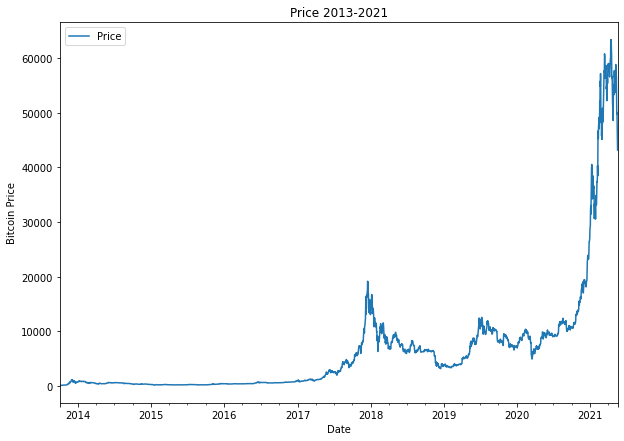

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("Bitcoin Price")
plt.title("Price 2013-2021")

#Import using python - csv

In [ ]:
import csv
from datetime import datetime
timesteps = []

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader(f,delimiter = ",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))
timesteps[:5],btc_price[:5]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0)],
 [123.65499, 125.455, 108.58483, 118.67466, 121.33866])

Text(0.5, 1.0, 'Price 2013-2021')

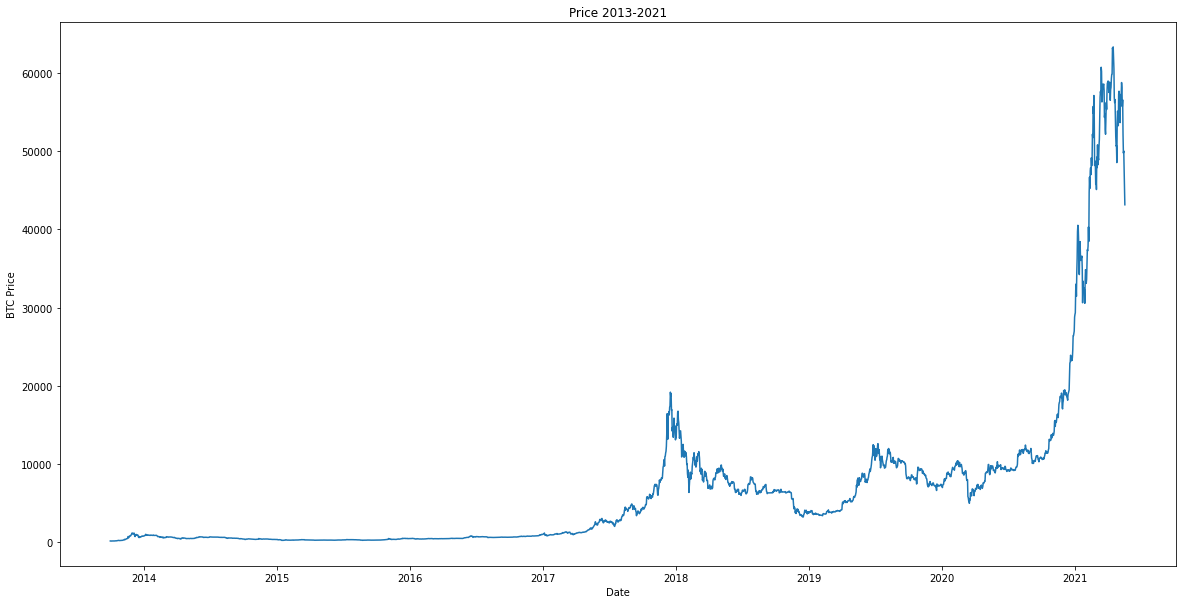

In [ ]:
#Plot 
plt.figure(figsize=(20,10))
plt.plot(timesteps,btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price 2013-2021")

#Create train and test sets 
- Wrong way

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
timesteps[:5],prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [ ]:
#Wrong way to train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(timesteps,prices,test_size=0.2,random_state=42)#Splits data randomly
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

Text(0, 0.5, 'BTC Price')

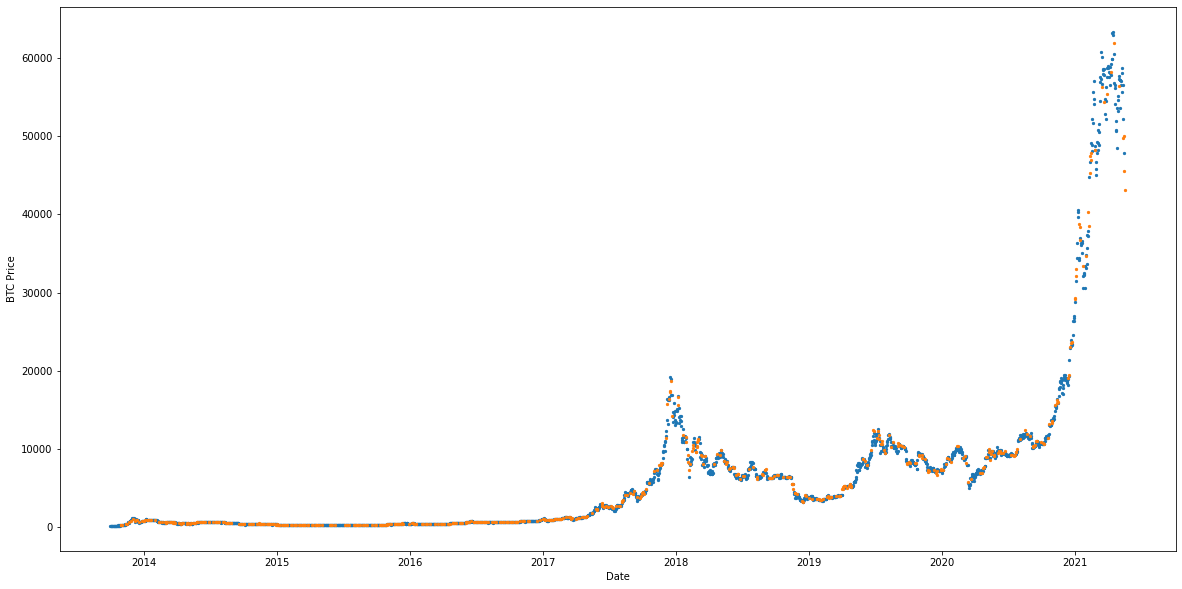

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")

In [ ]:
#Now in the rifght way
train_size = int(0.8*len(prices))
X_train,y_train = timesteps[:train_size],prices[:train_size]
X_test,y_test = timesteps[train_size:],prices[train_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2229, 2229, 558, 558)

Text(0, 0.5, 'BTC Price')

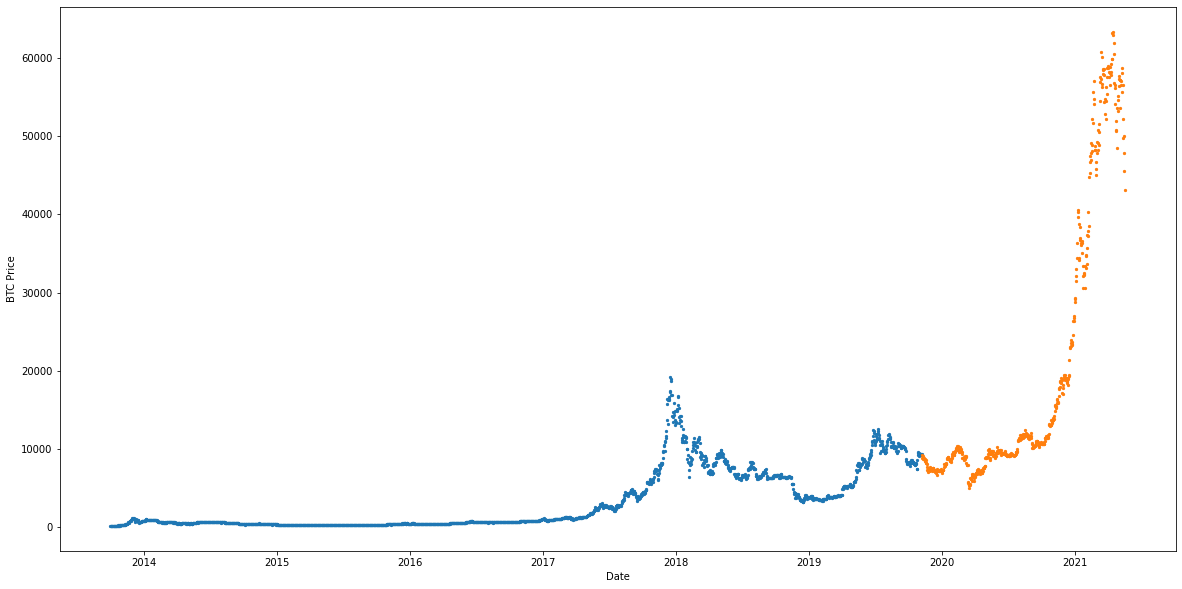

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")

In [ ]:
def plot_ts(timesteps,data,start=0,end=None,format=".",labels=None):
  plt.plot(timesteps[start:end],data[start:end],format,label=labels)
  plt.xlabel="Timesteps"
  plt.ylabel="BTC_Price"
  plt.grid(True)
  if labels:
    plt.legend()

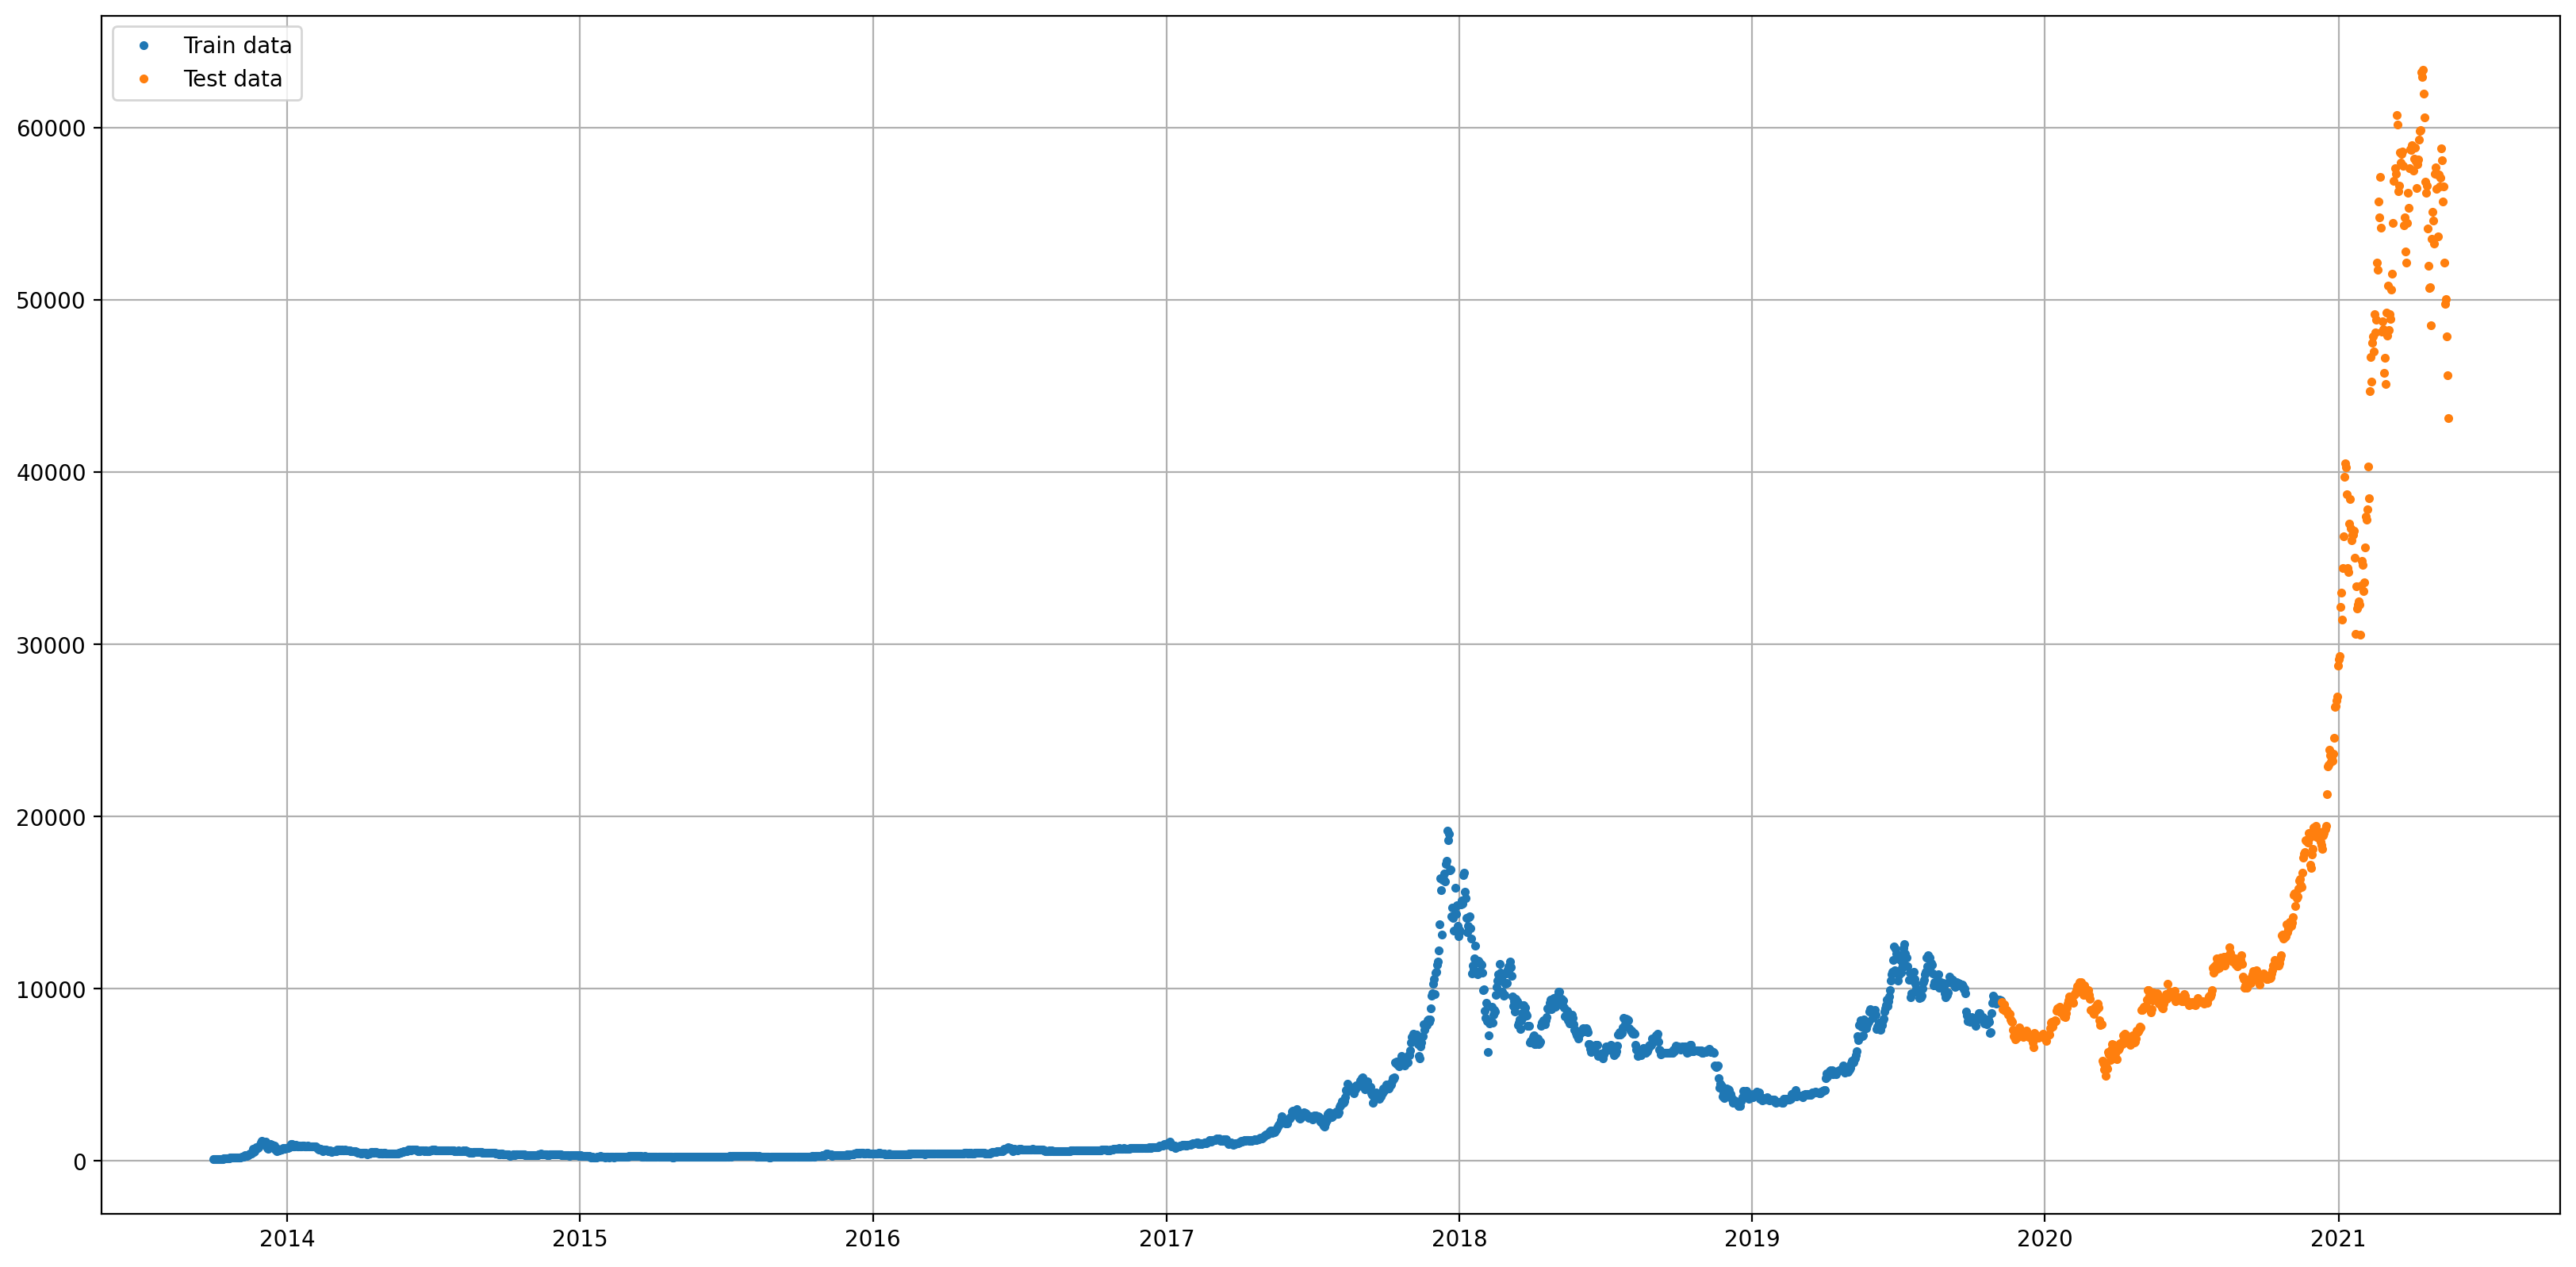

In [ ]:
plt.figure(figsize=(20,10),dpi=200)
plot_ts(timesteps=X_train,data=y_train,labels="Train data")
plot_ts(timesteps=X_test,data=y_test,labels="Test data")

## Modeling Experiments

1. Naive model (baseline)
2. Dense model, horizon =1 window=7
3. Same as model_1 but with another window = 30, horizon = 1
4. Same as model_1 but with another window = 30, horizon = 7
5. Conv1D
6. LSTM
7. Same as model 1 (but with multivariate data)
8. N-BEATS algorithm
9. Ensemble (multiple models stacked together)
10. Future prediction model
11. Same as model_1 but with turkey data introduced 

##Naive Model
- y(t) = y(t-1)
- autoregression

In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10] , y_test[:10]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]))

In [ ]:
naive_forecast[-10:], y_test[-10:]

(array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

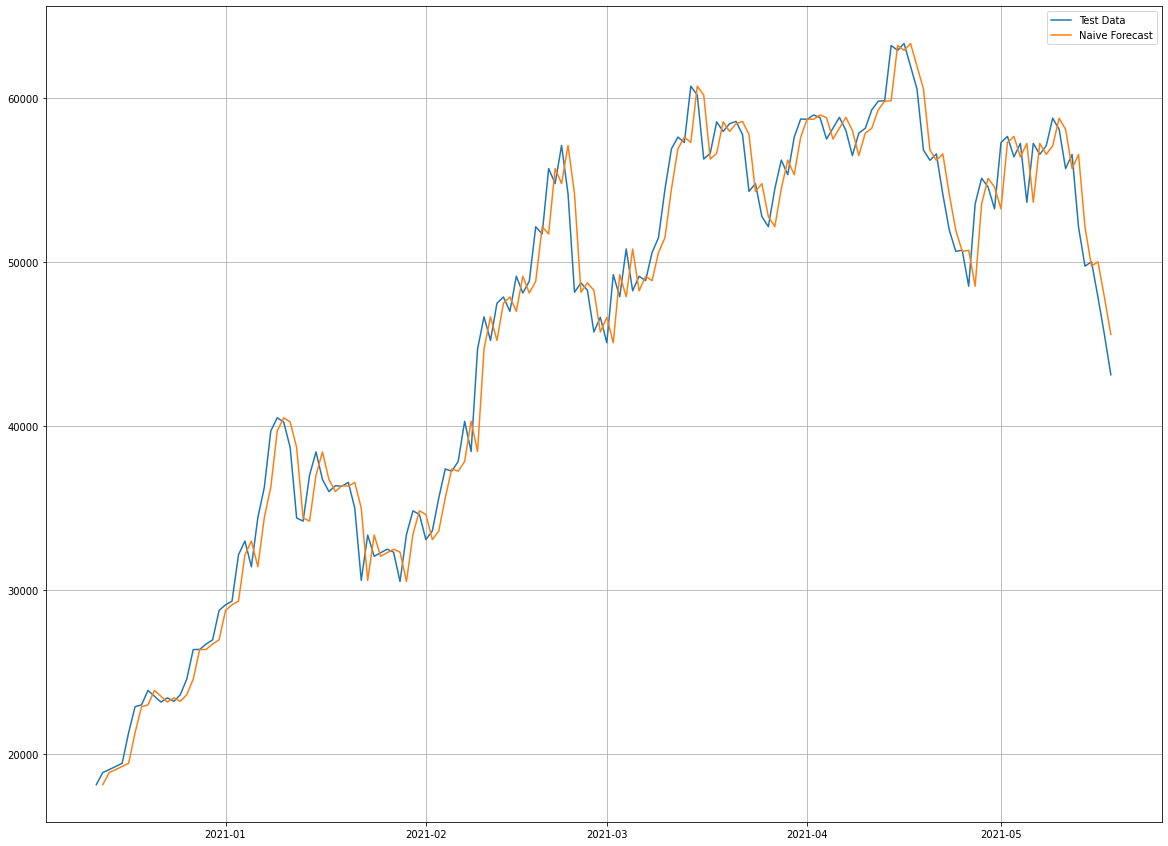

In [ ]:
plt.figure(figsize=(20,15))
#plot_ts(X_train,y_train,labels="Train Data")
plot_ts(X_test,y_test,start=400,format='-',labels="Test Data")
plot_ts(X_test[1:], naive_forecast,start=400,format='-', labels="Naive Forecast")

##Time series evaluation metrics
- MAE / MSE / RMSE / Huber
- MAPE = Mean absolute precentage error
- MASE = Mean absolute scaled error

In [ ]:
def mase(y_true,y_pred):
  """
  For non seasonality
  """
  import tensorflow as tf
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  #mae of naive forecast
  mae_naive = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae/mae_naive


In [ ]:
mase(y_true=y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [ ]:
def error_dict(y_true,y_pred):
  """
  Collect MAE, MASE, RMSE, MSE, MAPE to dictionary
  """
  errors = {}
  import tensorflow as tf
  import numpy as np
  errors["MAE"] = tf.reduce_mean(tf.abs(y_true-y_pred)).numpy()
  errors["MSE"] = tf.reduce_mean((y_true-y_pred)**2).numpy()
  errors["RMSE"] = np.sqrt(tf.reduce_mean((y_true-y_pred)**2))
  errors["MASE"] = mase(y_true,y_pred).numpy()
  errors["MAPE"] = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred).numpy()
  return errors

In [ ]:
error_dict(y_true=y_test[1:], y_pred = naive_forecast)

{'MAE': 567.9802273457541,
 'MSE': 1147547.125023896,
 'RMSE': 1071.2362601330744,
 'MASE': 0.9995699939182624,
 'MAPE': 2.516524929982267}

##Make windows for deep learning models - make it supervised
[0,1,2,3,4,5,6] -> 7

[1,2,3,4,5,6,7] -> 8

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7
import tensorflow as tf
def get_labelled_window(data,horizon=HORIZON):
  """
  Getting np. Input [1,2,3,4,5,6,7] -> Output ([1,2,3,4,5,6], [7])
  """
  return data[:,:-horizon], data[:,-horizon:]

In [ ]:
window, labels = get_labelled_window(tf.expand_dims(tf.range(8),axis=0))
tf.squeeze(window),tf.squeeze(labels)

(<tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=7>)

## Dwie opcje:
- Sliding window - Tutaj zostanie użyte
- Expanding window 

## Making windows manually

In [ ]:
#Make preprocessing function
#Ręczne tworzenie okien - Aczkolwiek jest gotowa funkcja - tf.keras.preprocessing.timeseries_dataset_from_array
"""
1. Window of window size
2. Window indexes
3. Data to made in 2 window indexes
4. Make windows with their labels
"""
def get_windows(data,window_size = WINDOW_SIZE,horizon=HORIZON):
  #1.
  window_steps = np.expand_dims(np.arange(window_size+horizon),axis=0)
  #2.
  window_indexes = window_steps + np.expand_dims(np.arange(len(data)-window_size-horizon+1),axis=0).T
  #3.
  window_values = data[window_indexes]
  #4.
  windows,labels = get_labelled_window(window_values,horizon=horizon)
  return windows,labels

In [ ]:
 np.expand_dims(np.arange(8), axis=0) + np.expand_dims(np.arange(20-7-1+1),axis=0).T

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [10, 11, 12, 13, 14, 15, 16, 17],
       [11, 12, 13, 14, 15, 16, 17, 18],
       [12, 13, 14, 15, 16, 17, 18, 19]])

In [ ]:
windows, labels = get_windows(prices)

In [ ]:
#First
for i in range(5):
  print(f"Input {windows[i]}  -> Output {labels[i]}")

Input [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]  -> Output [123.033]
Input [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ]  -> Output [124.049]
Input [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ]  -> Output [125.96116]
Input [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116]  -> Output [125.27966]
Input [121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966]  -> Output [125.9275]


In [ ]:
#Last
for i in range(5):
  print(f"Input {windows[i-5]}  -> Output {labels[i-5]}")

Input [56583.84987917 57107.12067189 58788.20967893 58102.19142623
 55715.54665129 56573.5554719  52147.82118698]  -> Output [49764.1320816]
Input [57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816 ]  -> Output [50032.69313676]
Input [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676]  -> Output [47885.62525472]
Input [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472]  -> Output [45604.61575361]
Input [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361]  -> Output [43144.47129086]


## Making windows with built in function
- tf.keras.preprocessing.timeseries_dataset_from_array

In [ ]:
tf.keras.preprocessing.timeseries_dataset_from_array(data=prices[:-1],targets=prices[1:],sequence_length=8,sequence_stride=1)

<BatchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

## Make train/test split

In [ ]:
def train_test_split(windows,labels,test_split):
  split = int(len(windows) * (1-test_split))
  train_windows = windows[:split]
  train_labels = labels[:split]
  test_windows = windows[split:]
  test_labels = labels[split:]
  return train_windows, train_labels,test_windows, test_labels

In [ ]:
train_windows, train_labels,test_windows, test_labels = train_test_split(windows=windows,labels=labels,test_split=0.2)

In [ ]:
len(train_windows), len(train_labels), len(test_windows),len(test_labels)

(2224, 2224, 556, 556)

In [ ]:
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ]])

In [ ]:
train_labels[:3]

array([[123.033  ],
       [124.049  ],
       [125.96116]])